In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

first_year = "2000"
last_year = "2022"

data = pd.concat([pd.read_csv("data/Europe.csv"), pd.read_csv("data/USA.csv"), pd.read_csv("data/China.csv")], ignore_index=True)
data.head()

,GeoName,Real GDP per capita 2022,log GDP per capita,log GDP per capita 2000,Real GDP per capita 2000,Ratio,Region,influence,Real GDP
0,AT,38080.0,10.547444,10.364387,31710.0,1.017662,Europe,0.001495,NaN
1,BE,37040.0,10.519754,10.305279,29890.0,1.020812,Europe,0.000903,NaN
2,BG,7680.0,8.946375,8.003029,2990.0,1.117874,Europe,0.000386,NaN
3,CY,27480.0,10.221214,9.909967,20130.0,1.031407,Europe,0.004007,NaN
4,CZ,18460.0,9.823362,9.326344,11230.0,1.053292,Europe,0.006018,NaN


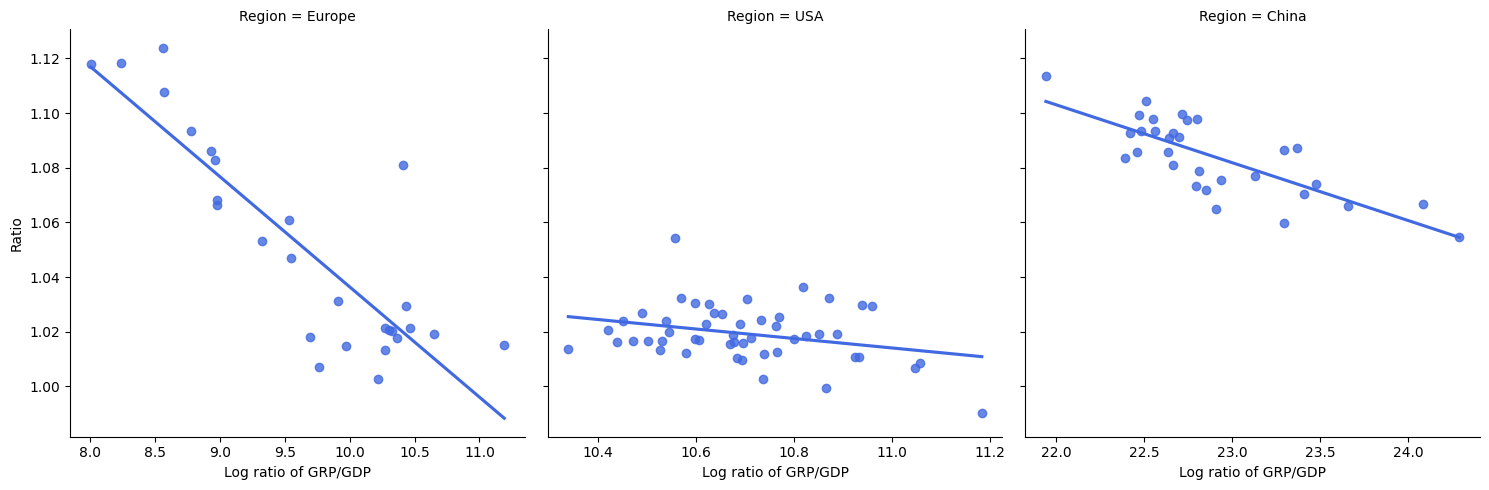

In [36]:
scatter_kws = {"color": "royalblue"}
line_kws = {"color": "royalblue"}
ax = sns.lmplot(data, x=f"log GDP per capita {first_year}", y="Ratio", col="Region", facet_kws={"sharex": False}, fit_reg=True, ci=None, scatter_kws=scatter_kws, line_kws=line_kws)
ax.set_xlabels("Log GRP/GRP per capita (2000)")
ax.set_xlabels("Log ratio of GRP/GDP")
ax.figure.savefig("fig_output/Fig_04.png", dpi=600)

In [37]:
for i, region in enumerate(data["Region"].unique().tolist()):
    data = data.rename(columns={f"log GDP per capita {first_year}": "x"})
    data_reg = data[data["Region"] == region]
    formula = f"Ratio ~ x"
    model = smf.ols(formula = formula, data = data_reg)
    result = model.fit()
    result.summary()

In [38]:
data = pd.concat([pd.read_csv("data/Europe_sigma.csv"), pd.read_csv("data/USA_sigma.csv"), pd.read_csv("data/China_sigma.csv")], ignore_index=True)
data.head()

,Year,log GDP per capita,Region
0,2000,0.827142,Europe
1,2001,0.810719,Europe
2,2002,0.789507,Europe
3,2003,0.767598,Europe
4,2004,0.749771,Europe


/var/folders/gt/hp_y969x7hgchgtzlj0y7nhc0000gn/T/ipykernel_24645/4017976700.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns_lineplot = sns.lineplot(data[data["Region"] == region], x=f"Year", y="log GDP per capita", palette=palette, ax=ax[i], linewidth=2, estimator=None)
/var/folders/gt/hp_y969x7hgchgtzlj0y7nhc0000gn/T/ipykernel_24645/4017976700.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns_lineplot = sns.lineplot(data[data["Region"] == region], x=f"Year", y="log GDP per capita", palette=palette, ax=ax[i], linewidth=2, estimator=None)
/var/folders/gt/hp_y969x7hgchgtzlj0y7nhc0000gn/T/ipykernel_24645/4017976700.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns_lineplot = sns.lineplot(data[data["Region"] == region], x=f"Year", y="log GDP per capita", palette=palette, ax=ax[i], linewidth=2, estimator=None)


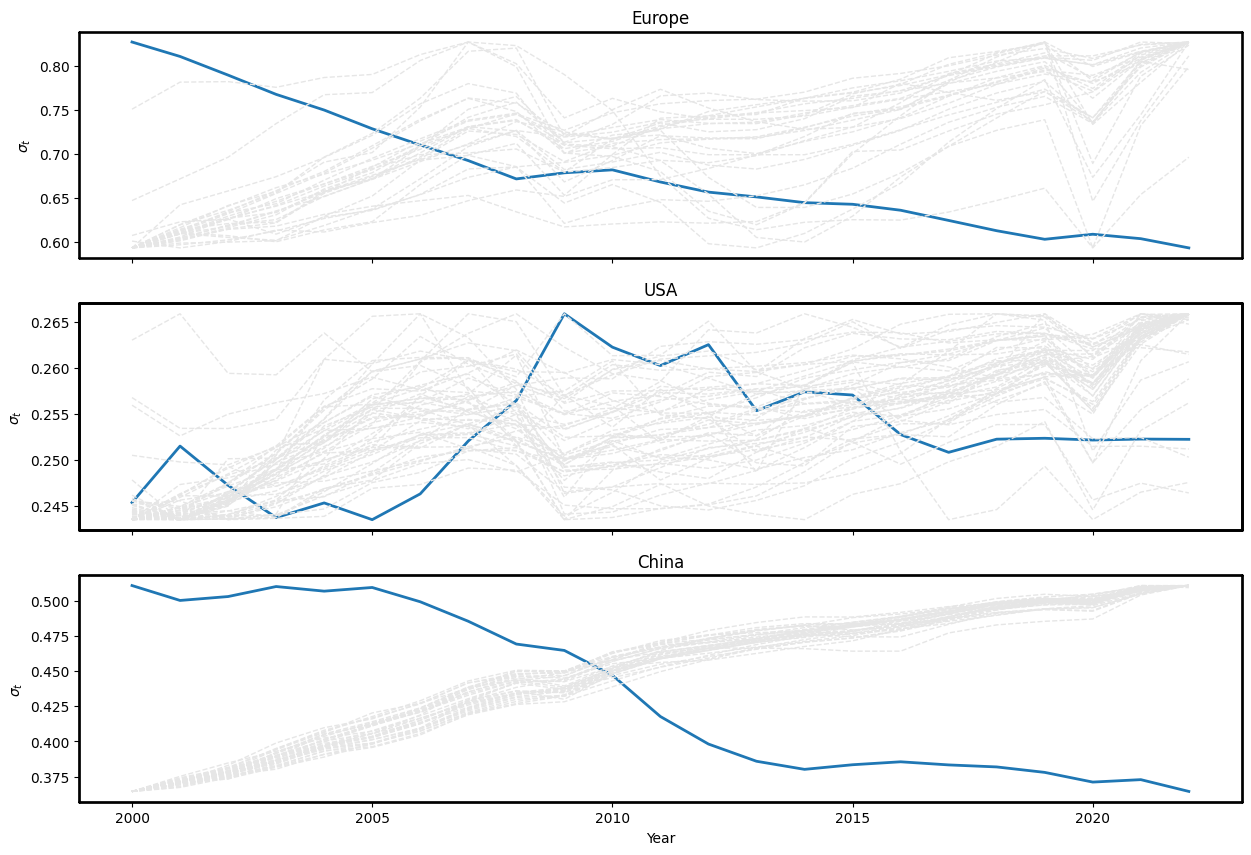

In [40]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15, 10))

palette = sns.color_palette("Set2", 3)
data = data[data["Year"] >= 2000]

data2_list = [pd.read_csv("data/Europe_RealGDP.csv"), pd.read_csv("data/USA_RealGDP.csv"), pd.read_csv("dataChina_RealGDP.csv")]

for i, region in enumerate(data["Region"].unique()):
    #sns_lineplot.get_legend().remove()
    data2 = data2_list[i]
    for geo_name in data2["GeoName"].unique():
        ax2 = ax[i].twinx()
        data_current = data2[data2["GeoName"] == geo_name]
        data_current = data_current[data_current["Year"] >= 2000]
        sns.lineplot(data=data_current, x="Year", y="log GDP per capita", color=".9", linewidth=1, ax=ax2, linestyle="dashed")
        ax2.set_ylabel('')
        ax2.set_yticklabels([]) 
        ax2.set_yticks([]) 
        
    sns_lineplot = sns.lineplot(data[data["Region"] == region], x=f"Year", y="log GDP per capita", palette=palette, ax=ax[i], linewidth=2, estimator=None)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel(r'$\sigma_t$')
    ax[i].set_title(region)
    
fig.savefig("fig_output/Fig_05.png", dpi=600)

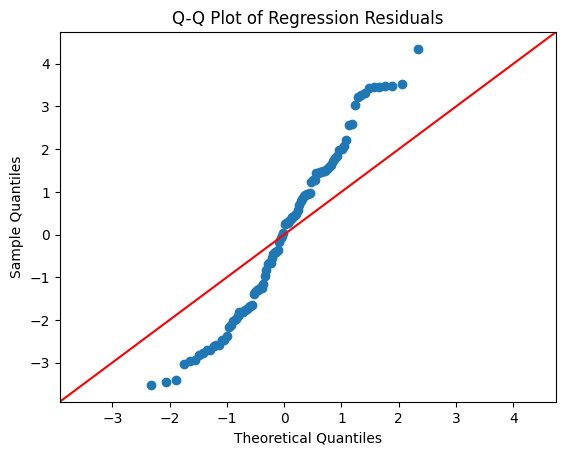

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Sample data creation
# Assuming 'x' is your independent variable and 'y' is your dependent variable
np.random.seed(0)  # For reproducibility
x = np.random.rand(100) * 10  # 100 random numbers scaled up to 10
y = 2.5 * x + np.random.randn(100) * 2  # A simple linear relationship with some noise

# Creating a DataFrame from the data
data = pd.DataFrame({'x': x, 'y': y})

# Fitting a simple linear regression model
model = smf.ols('y ~ x', data=data).fit()

# Getting the residuals from the model
residuals = model.resid

# Generating the Q-Q plot
fig = sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Regression Residuals')
plt.show()
